In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [53]:
##initialize the datasets path
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

##set images in similar size(there may be have images in different resolutions)
img_width =180
img_height = 180

In [4]:
##import datasets as arrays which lay in the folders
data_train = tf.keras.utils.image_dataset_from_directory(data_train_path,
                                                         shuffle=True,
                                                         image_size=(img_width,img_height),
                                                         batch_size=32,
                                                         validation_split=False)

data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                        shuffle=True, 
                                                        image_size=(img_width,img_height),
                                                        batch_size=32,
                                                        validation_split=False)

data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                        shuffle=True, 
                                                        image_size=(img_width,img_height),
                                                        batch_size=32,
                                                        validation_split=False)

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


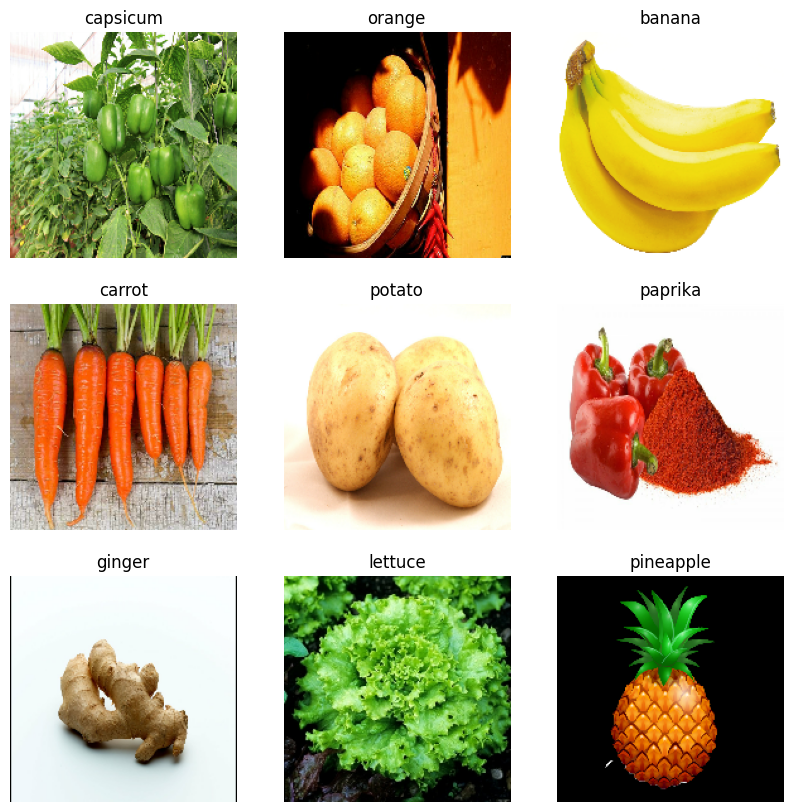

In [44]:
##See the different classnames in the directories
data_categories = data_train.class_names
print(data_categories)

##plot 09 images of the train dataset
plt.figure(figsize=(10,10))
for image,label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_categories[label[i]]) 
        plt.axis("off")

In [7]:
##Initiate the model
from tensorflow.keras.models import Sequential

model = Sequential([layers.Rescaling(1./255), 
                    layers.Conv2D(16, 3, padding='same',activation='relu'),##layer 1
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3,padding='same',activation='relu'),##layer2
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3 ,padding='same', activation='relu'),##layer3
                    layers.MaxPooling2D(),
                    layers.Flatten(), #Flattens the 3D output (height, width, channels) into a 1D vector.This is needed before feeding into Dense (fully connected) layers.
                    layers.Dropout(0.2),#Dropout randomly disables 20% of neurons during training to prevent overfitting.
                    layers.Dense(128),#Fully connected layer with 128 neurons.
                    layers.Dense(len(data_categories)) #number of neurons = number of classes.
                    ])
##layers.Rescaling(1./255)-divide every color by 255 (maximum pixel count) 
#layers.Conv2D(16, 3, padding='same',activation='relu')-convert layers into 2D by using 16 neurons 3 filters

In [8]:
##create the compile the model

#Optimizer: how the model learns
#Loss function: how the error is calculated
#Metrics: what performance metric to monitor during training
model.compile(optimizer='adam' ,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
#Categorical Crossentropy is the loss function used for multi-class classification (when labels are one-hot encoded).
#from_logits=True means your model's output layer does not have a softmax (i.e., outputs raw logits).
# TensorFlow will apply softmax internally before computing the loss.

In [9]:

history = model.fit(data_train, validation_data=data_val, epochs=25)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 407ms/step - accuracy: 0.0722 - loss: 3.6065 - val_accuracy: 0.3362 - val_loss: 2.2605
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 337ms/step - accuracy: 0.2816 - loss: 2.5024 - val_accuracy: 0.5413 - val_loss: 1.6816
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 338ms/step - accuracy: 0.4288 - loss: 1.9977 - val_accuracy: 0.8091 - val_loss: 0.8878
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 381ms/step - accuracy: 0.6047 - loss: 1.3277 - val_accuracy: 0.8575 - val_loss: 0.6101
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 405ms/step - accuracy: 0.7799 - loss: 0.7748 - val_accuracy: 0.8661 - val_loss: 0.5330
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 444ms/step - accuracy: 0.8609 - loss: 0.5303 - val_accuracy: 0.9259 - val_loss: 0.3979
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 373ms/step - accuracy: 0.9056 - loss: 0.3151 - val_accuracy: 0.9402 - val_loss: 0.4044
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 400ms/step - accuracy: 0.9483 - loss: 0.2335 - val_accu

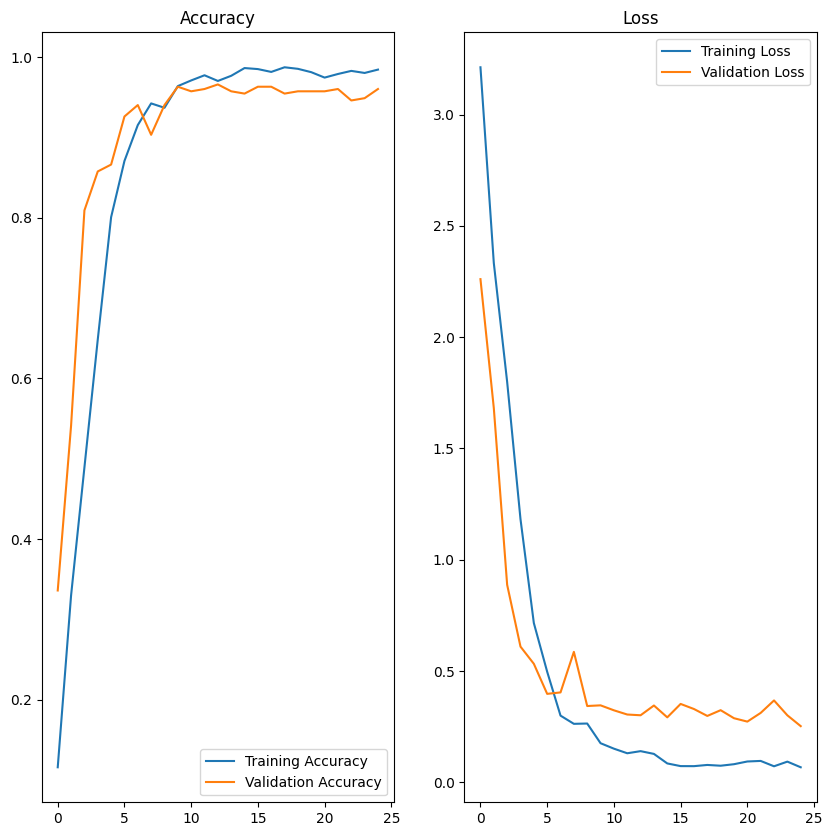

In [50]:
#draw some graphs represent the difference between train accuracy and the validation accuracy
epochs_size =  25
epochs_range = range(epochs_size)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.legend()

#draw the plots to loss also
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.legend()

In [96]:
#Testing the model
image_path = 'Chilli.jpeg'
image = tf.keras.utils.load_img(image_path, target_size=(img_height,img_width))
image_array = tf.keras.utils.img_to_array(image) 
image_bat = tf.expand_dims(image_array,0)

In [97]:
#pass the image array to the model to predict
predict = model.predict(image_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [98]:
score = tf.nn.softmax(predict[0])
print('The entered image is a {} with accuracy of {:0.2f}'.format(data_categories[np.argmax(score)],np.max(score)*100))

The entered image is a raddish with accuracy of 95.98


In [85]:
#save the model
model.save('Image_classify.keras')